In [37]:
import json
def load_data(file):
    with open(file , "r") as f:
        data = json.load(f)
    return data

In [38]:
data  = load_data("store_data.json")
print(data)

[{'name': 'Alice', 'rating': '5 ', 'feedback': 'Great product!!', 'age': '25'}, {'name': 'Bob', 'rating': 'four', 'feedback': 'ok but late Delivery', 'age': '30'}, {'name': ' Charlie', 'rating': 'two', 'feedback': 'BAD EXPERIENCE '}, {'name': 'Diana', 'feedback': 'Loved it!', 'rating': '5', 'age': '28'}, {'name': 'Eve', 'rating': '3.5', 'feedback': 'Average - could be better', 'age': '20'}, {'name': 'Alice', 'rating': '5', 'feedback': 'Great product again!', 'age': '25'}]


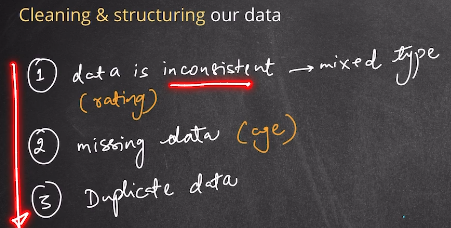

In [ ]:
def clean_data(data):
    text_to_num = {"one":1 , "two": 2 , "three" : 3 , "four" : 4 , "five": 5}

    unique_set = set()
    cleaned_data = []


    for user in data:
        # clean rating - consistent type
        raw_rating = str(user['rating']).strip().lower()
        if raw_rating in text_to_num:
            raw_rating = text_to_num[raw_rating]
        user['rating'] = raw_rating


        # handling missing age
        raw_age  = user.get('age')
        if raw_age == None:
            user['age'] = None

        # duplicate value
        if user['name'].strip() in unique_set:
            continue
        unique_set.add(user['name'])


        cleaned_data.append(user)

    return cleaned_data
clean_data(data)


[{'name': 'Alice', 'rating': '5', 'feedback': 'Great product!!', 'age': '25'},
 {'name': 'Bob', 'rating': 4, 'feedback': 'ok but late Delivery', 'age': '30'},
 {'name': ' Charlie', 'rating': 2, 'feedback': 'BAD EXPERIENCE ', 'age': None},
 {'name': 'Diana', 'feedback': 'Loved it!', 'rating': '5', 'age': '28'},
 {'name': 'Eve',
  'rating': '3.5',
  'feedback': 'Average - could be better',
  'age': '20'}]

In [40]:
data = clean_data(data)

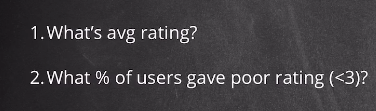

In [41]:
# get insight

def get_insights(data):
    # avg rating
    avg_rat = 0
    for user in data:
        avg_rat+= float(user['rating'])
    print(f'Avarage Rating of the Product = {avg_rat/len(data)}')


    # poor rating

    poor_rating = 0
    for user in data:
        if float(user['rating']) < 3.0:
            poor_rating+=1
    print(f'% of poor rating in this product: {poor_rating/len(data)*100}')

get_insights(data)



Avarage Rating of the Product = 3.9
% of poor rating in this product: 20.0


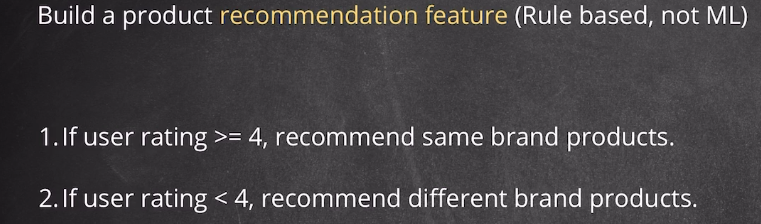

In [ ]:
# product recommendation 

def get_recommend(data):
    recommend = []

    for user in data:
        curr_recomm ={}
        curr_recomm['name'] = user['name']

        if float(user['rating']) <= 4 :
            curr_recomm['brand'] = "Apple"
        else:
            curr_recomm['brand'] = 'Samsung'
        recommend.append(curr_recomm)
    return recommend
get_recommend(data)


[{'name': 'Alice', 'brand': 'Samsung'},
 {'name': 'Bob', 'brand': 'Apple'},
 {'name': ' Charlie', 'brand': 'Apple'},
 {'name': 'Diana', 'brand': 'Samsung'},
 {'name': 'Eve', 'brand': 'Apple'}]